# Introduction to Spark

Is an open source solution for Big Data.

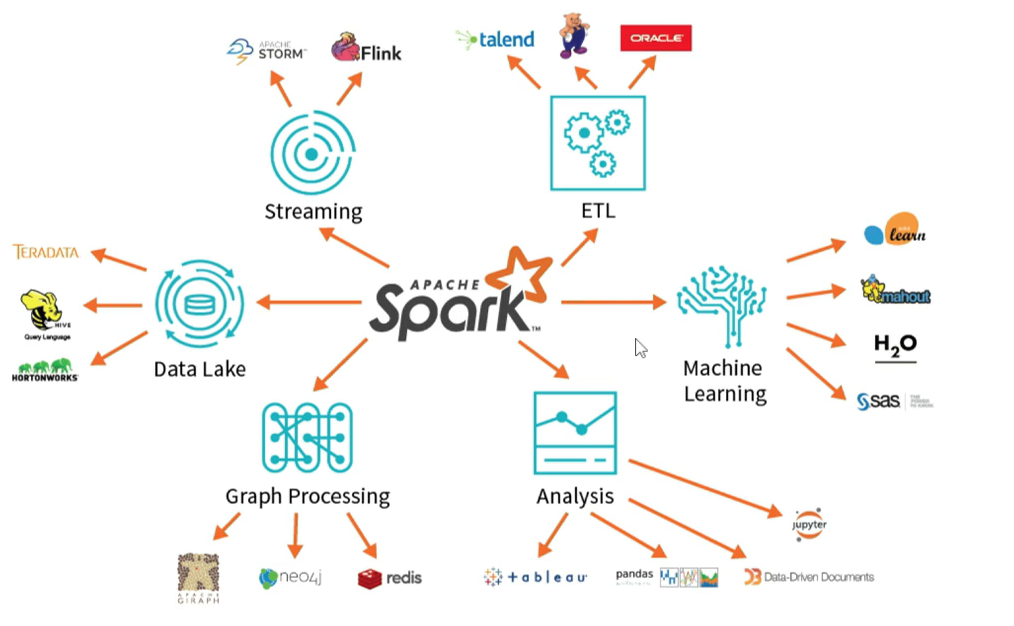

An alternative to Spark is Hadoop MapReduce. The main differences between this two are:

- Spark stores the data in the cache memory, MapReduce stores it in the disk
- Spark is optimized for parallel computing.
- Spark has a better functional programming model
- Spark is useful for iterative algorithms.

## Execute Spark in a cluster

A cluster is a resource manager which has two main elements which are:

- Controller: Control both elements with an spark session.
- Workers: Each worker has its own executions and storage locations

In order to execute Spark we have to initialize an Spark Session which is located inside the Controller.

The cluster assigns task to all the workers, a task for each partition.

# Spark environment

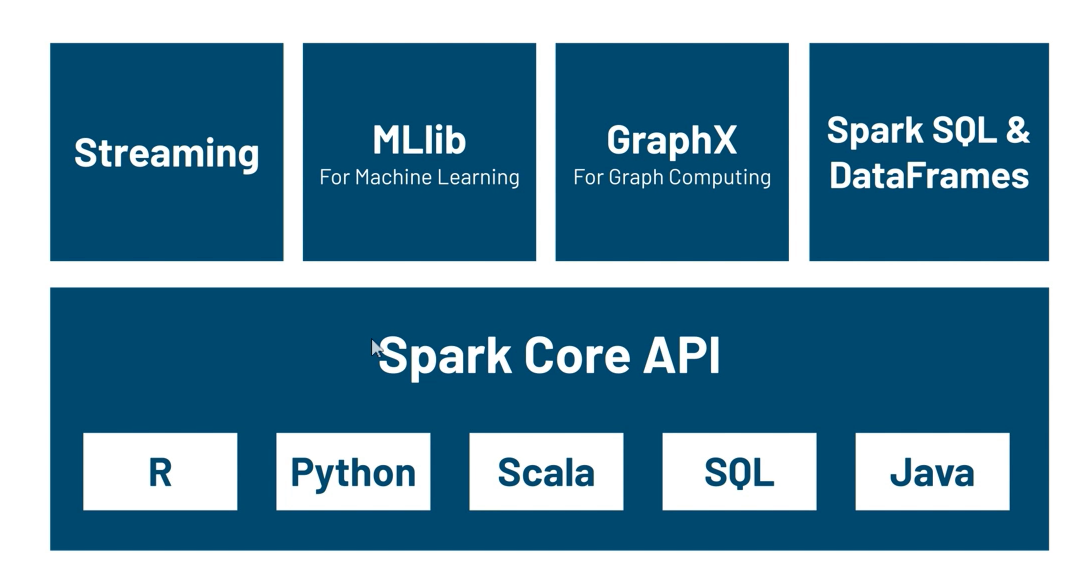

- Spark Core API: Stores the basic functionality of spark and the API that defines the RDS for many languages like R, Python, Scala, SQL and Java. 
- Spark SQL & DataFrames: Package used to work with structured data and query data by SQL or Apache Hive. 
- Spark streaming: For real time data processing, similar to the RDS API
- MLib: For machine Learning, to use many algorithms for ML.
- GraphX: Manipulate Graphs and perform calculations using graphs.

# PySpark

Is an Spark Library written in Python to execute python with Apache Spark capabilities.

## PysPark architecture

Mater-slave. The operations are executed in the workers and the Cluster Manager manages all the resources. Is the same architecture as Apache Spark

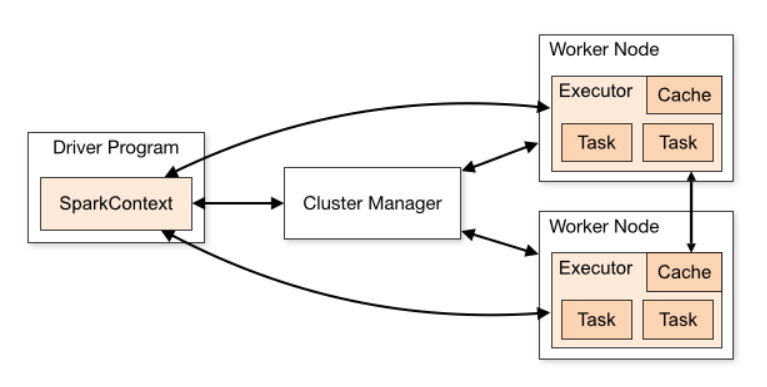

When an Spark application is executed, the Spark Driver creates a context which is the entry point to the application and all the operations are executed in the worker nodes.

Spark Cluster Managers:

- Standalone: Multiple Cluster Manager
- Apache Mesos: Cluster Manager that can execute Hadoop MapReduce and PySpark
- Hadoop YARN: Resource manager for Hadoop 2
- Kubernetes: To Automate the implementation and management of applications in containers



# DataFrames (df) in Apache Spark

The DataFrames are a tabular data structure. They are conformed by Rows and columns.

The rows from the dataFrames can store multiple data types but the columns should be from the same data type. They are similar to an SQL table.

They keep metadata from the information that we store there. 

DataFrames advantages with Spark:
- Work with semi-structured and structured data in big volumes of data.
- The data is stored in columns so its easier to identify the identify the data schema from a df. It helps Spark to optimize the queries.
- Easy data handling (transformations, creation, filtering)
- We can select from a great variety of data sources and formats.
- They are compatible with multiple languages like python, R, Scala or Java.

Spark DataFrames main characteristics>
- Fault Tolerance
- Distributed Storage
- Lazy Evaluation
- Immutability, we can edit the data but it will really generate a copy of the original DataFrame

## Main Functions/Operations for PySpark DataFrames

- df.printSchema() To show the columns, its data types and if they allow null values or not.
- df.select() Select the columns that we specify from the DatFrame
- df.filter() Filter the rows based on a conditions, there are multiple ways for filtering data.
- df.drop() Will create a copy of the df but without the columns that we sent to the function.
- df.groupBy().agg(count(column), sum(column).alias()) To create aggregation functions.
- df.sort() Sort the df by some columns
- df.withColumn() Create new columns based on existing columns.
- df.join() Join two dfs based on a condition.



# Crate the Spark Session

In [67]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import findspark

findspark.init()
spark = SparkSession.builder.getOrCreate()

In [68]:
emp = [(1, "AAA", "dept1", 1000),
    (2, "BBB", "dept1", 1100),
    (3, "CCC", "dept1", 3000),
    (4, "DDD", "dept1", 1500),
    (5, "EEE", "dept2", 8000),
    (6, "FFF", "dept2", 7200),
    (7, "GGG", "dept3", 7100),
    (8, "HHH", "dept3", 3700),
    (9, "III", "dept3", 4500),
    (10, "JJJ", "dept5", 3400)]

dept = [("dept1", "Department - 1"),
        ("dept2", "Department - 2"),
        ("dept3", "Department - 3"),
        ("dept4", "Department - 4")

       ]

df = spark.createDataFrame(emp, ["id", "name", "dept", "salary"])

deptDf = spark.createDataFrame(dept, ["id", "name"]) 



In [69]:
df.dtypes

[('id', 'bigint'),
 ('name', 'string'),
 ('dept', 'string'),
 ('salary', 'bigint')]

In [70]:
print(df.schema)
df.printSchema()

StructType([StructField('id', LongType(), True), StructField('name', StringType(), True), StructField('dept', StringType(), True), StructField('salary', LongType(), True)])
root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- dept: string (nullable = true)
 |-- salary: long (nullable = true)



# Select columns from a DataFrame

In [71]:
df.select("id", "name").show()

+---+----+
| id|name|
+---+----+
|  1| AAA|
|  2| BBB|
|  3| CCC|
|  4| DDD|
|  5| EEE|
|  6| FFF|
|  7| GGG|
|  8| HHH|
|  9| III|
| 10| JJJ|
+---+----+



# Filtering options with Pyspark

In [72]:
df.filter(df["id"] == 1).show()
df.filter(df.id == 1).show()

df.filter(col("id") == 1).show()
df.filter("id = 1").show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+



# Drop a dataFrame

In [73]:
newDf = df.drop("id")
newDf.show(2)

+----+-----+------+
|name| dept|salary|
+----+-----+------+
| AAA|dept1|  1000|
| BBB|dept1|  1100|
+----+-----+------+
only showing top 2 rows



# Aggregation Functions

In [74]:
df.groupBy("dept").agg(
    count("salary").alias("count"),
    sum("salary").alias("sum"),
    max("salary").alias("max"),
    min("salary").alias("min"),
    avg("salary").alias("avg")
    ).show()


+-----+-----+-----+----+----+------+
| dept|count|  sum| max| min|   avg|
+-----+-----+-----+----+----+------+
|dept1|    4| 6600|3000|1000|1650.0|
|dept2|    2|15200|8000|7200|7600.0|
|dept3|    3|15300|7100|3700|5100.0|
|dept5|    1| 3400|3400|3400|3400.0|
+-----+-----+-----+----+----+------+



# Joins with DataFrames

We can create multiple joins with df.join(), by default it uses the inner join.

Jon types with A (df1) & B (df2) dfs:
- Left Outer: Only What is in A alone and what it has in common with B. Will generate null values for some columns
- Right Outer: Only what is in B alone and what it has in common with A. Will generate null values for some columns
- Full Outer: Will take the rows that both dfs have in common and what they don't. Will generate null values for some columns
- Inner Join: Take only what is common in both dfs.
- Left Anti: Take only what is in A but not in common with B. Will generate null values for some columns
- Right Anti: Take only what is in B but not in common with A. Will generate null values for some columns

__syntax:__

df1.join(df2, condition, joinType)



# Inner Join

In [75]:
# Inner Join
df.join(deptDf, df['dept'] == deptDf['id']).show()

+---+----+-----+------+-----+--------------+
| id|name| dept|salary|   id|          name|
+---+----+-----+------+-----+--------------+
|  1| AAA|dept1|  1000|dept1|Department - 1|
|  2| BBB|dept1|  1100|dept1|Department - 1|
|  3| CCC|dept1|  3000|dept1|Department - 1|
|  4| DDD|dept1|  1500|dept1|Department - 1|
|  5| EEE|dept2|  8000|dept2|Department - 2|
|  6| FFF|dept2|  7200|dept2|Department - 2|
|  7| GGG|dept3|  7100|dept3|Department - 3|
|  8| HHH|dept3|  3700|dept3|Department - 3|
|  9| III|dept3|  4500|dept3|Department - 3|
+---+----+-----+------+-----+--------------+



# Left Outer Join

In [76]:
df.join(deptDf, df['dept'] == deptDf['id'], "left_outer").show()

+---+----+-----+------+-----+--------------+
| id|name| dept|salary|   id|          name|
+---+----+-----+------+-----+--------------+
|  1| AAA|dept1|  1000|dept1|Department - 1|
|  2| BBB|dept1|  1100|dept1|Department - 1|
|  3| CCC|dept1|  3000|dept1|Department - 1|
|  4| DDD|dept1|  1500|dept1|Department - 1|
|  5| EEE|dept2|  8000|dept2|Department - 2|
|  6| FFF|dept2|  7200|dept2|Department - 2|
|  7| GGG|dept3|  7100|dept3|Department - 3|
|  8| HHH|dept3|  3700|dept3|Department - 3|
|  9| III|dept3|  4500|dept3|Department - 3|
| 10| JJJ|dept5|  3400| null|          null|
+---+----+-----+------+-----+--------------+



# Right Outer Join

In [77]:
df.join(deptDf, df['dept'] == deptDf['id'], "right_outer").show()

+----+----+-----+------+-----+--------------+
|  id|name| dept|salary|   id|          name|
+----+----+-----+------+-----+--------------+
|   4| DDD|dept1|  1500|dept1|Department - 1|
|   3| CCC|dept1|  3000|dept1|Department - 1|
|   2| BBB|dept1|  1100|dept1|Department - 1|
|   1| AAA|dept1|  1000|dept1|Department - 1|
|   6| FFF|dept2|  7200|dept2|Department - 2|
|   5| EEE|dept2|  8000|dept2|Department - 2|
|   9| III|dept3|  4500|dept3|Department - 3|
|   8| HHH|dept3|  3700|dept3|Department - 3|
|   7| GGG|dept3|  7100|dept3|Department - 3|
|null|null| null|  null|dept4|Department - 4|
+----+----+-----+------+-----+--------------+



# Full Outer Join

In [78]:
df.join(deptDf, df['dept'] == deptDf['id'], "outer").show()

+----+----+-----+------+-----+--------------+
|  id|name| dept|salary|   id|          name|
+----+----+-----+------+-----+--------------+
|   1| AAA|dept1|  1000|dept1|Department - 1|
|   2| BBB|dept1|  1100|dept1|Department - 1|
|   3| CCC|dept1|  3000|dept1|Department - 1|
|   4| DDD|dept1|  1500|dept1|Department - 1|
|   5| EEE|dept2|  8000|dept2|Department - 2|
|   6| FFF|dept2|  7200|dept2|Department - 2|
|   7| GGG|dept3|  7100|dept3|Department - 3|
|   8| HHH|dept3|  3700|dept3|Department - 3|
|   9| III|dept3|  4500|dept3|Department - 3|
|null|null| null|  null|dept4|Department - 4|
|  10| JJJ|dept5|  3400| null|          null|
+----+----+-----+------+-----+--------------+



# SQL Queries with PySpark

Spark has an API to execute SQL queries we just have to store the df has a temporal view. As it is temporal it will only last till the Spark Session is done.

df.CreateOrReplaceView('table name') will create or replace the view that we specified with the selected df. Once it's created we will be able to query the table with spark.sql('query')

In [79]:
#Create Temporary Table
df.createOrReplaceTempView('dfTable')

#Query the view
spark.sql('SELECT * FROM dfTable WHERE id = 1').show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+



In [80]:
spark.sql('SELECT DISTINCT id FROM dfTable').show(5)

+---+
| id|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
+---+
only showing top 5 rows



# Data ingestion to DataFrames and exporting a DataFrame

Source options:
- Working with a Hive table
```python
# dbName -> Name of the Hive DB
# tblName -> Name of the Hive table
df = spark.table('dbName', 'tblName')
df.write.saveAsTable('dbName.tblName', mode='overwrite')#Store the data in Hive
df.write.saveAsTable('dbName.tblName', path=<external location>)
```
- DataFrame with CSV's
```python
df = spark.read.csv('path to csv', sep='|', header= True, inferSchema=True)#Read data
df.write.csv('path to csv file', sep='|', header=True, mode='append')#Write df to csv
```
- From a relational DB
```python
#url -> JDBC URL of the form jdbc:subprotocol:subname
#tblName -> Db table
# userName -> User to connect to the db
# password -> password from the user to connect to the db

relationalDf = spark.read.format('jdbc').options(url=url, dbTable= tblName
, user= userName, password=password).load()
relationalDf.write.format('jdbc').options(url=url, dbTable= tblNme, user= userName, password=password).mode('overwrite').save()
```

When exporting data we could select one of many modes such as:
- overwrite
- append
- error
- etc

# Advanced functions and performance optimization in PySpark

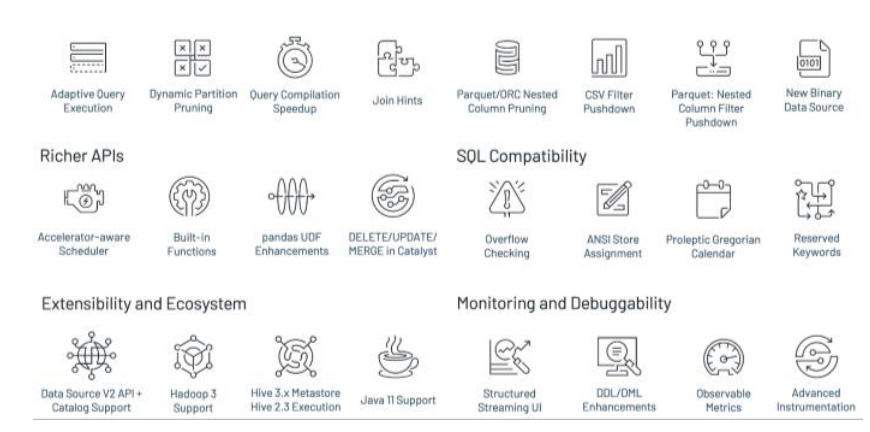

The main advanced functions are the select expressions (selectExpr()), UserDefinedFunctions(UDF), cache(), etc.

## Optimizing performance

We can use the cache() and persist() methods to store an intermediate calculation from an RDD, DataFrame and Dataset so they can be used later.

They can be used when we have a repetitive task in two different actions or when will have a massive data processing step in the workflow so we can divide it and store the steps within the workflow.

When we persist data in Spark all the data will be tolerant to failure, this means that if we loose a partition from the dataFrame it can be automatically recalculated using the original transformations that created the data.

In [81]:
emp = [(1, "AAA", "dept1", 1000),
    (2, "BBB", "dept1", 1100),
    (3, "CCC", "dept1", 3000),
    (4, "DDD", "dept1", 1500),
    (5, "EEE", "dept2", 8000),
    (6, "FFF", "dept2", 7200),
    (7, "GGG", "dept3", 7100),
    (None, None, None, 7500),
    (9, "III", None, 4500),
    (10, None, "dept5", 2500)]

dept = [("dept1", "Department - 1"),
        ("dept2", "Department - 2"),
        ("dept3", "Department - 3"),
        ("dept4", "Department - 4")
       ]

df = spark.createDataFrame(emp, ["id", "name", "dept", "salary"])
deptDf = spark.createDataFrame(dept, ["id", "name"]) 

# Create Temp Tables
df.createOrReplaceTempView("empDf")
deptDf.createOrReplaceTempView("deptDf")

# Save as HIVE tables. In case we loose the session we can retrieve the tables.
df.write.saveAsTable("hive_empDf", mode = "overwrite")
deptDf.write.saveAsTable("hive_deptDf", mode = "overwrite")

# BroadCast Join

It helps to improve the performance when doing a join. Is useful when we want to join data from a small Df with a large one. It will reduce the data mix in the small Df to improve the performance of the joins. By default the small Df should be from 10 MB but it can increase up to 8 GB. 

In [82]:
size = int(spark.conf.get("spark.sql.autoBroadcastJoinThreshold")[:-1])/ (1024 * 1024)
print("Default size of broadcast table is {0} MB.".format(size))

Default size of broadcast table is 5.0 MB.


In [83]:
spark.conf.set("spark.sql.autoBroadcastJoinThreshold", 50 * 1024 * 1024)# Set the table size to 50 MB.

In [84]:
# The small df could be store in the memory and it also needs to be lighter than the size that we set before
# df should be the bigger data frame.
joinDf = df.join(broadcast(deptDf), df['id'] == deptDf['id'])
joinDf

DataFrame[id: bigint, name: string, dept: string, salary: bigint, id: string, name: string]

# Store in cache or persist

To store something in the memory in order to improve the performance of the application.

We have to be careful with the amount of information that we keep in cache because it can affect the performance.

We can store in cache but also clean it.

If we are using Spark 2.0 the store will by only in the memory, from 2.1 and above the data will be stored in both memory and disk. If we want to specify the storage location we will need the persist method.

In [85]:
df.cache()#Persist the df in the memory. 
df.count()
print("Memory Used : {0}".format(df.storageLevel.useMemory))
print("Disk Used : {0}".format(df.storageLevel.useDisk))

Memory Used : True
Disk Used : True


Wen we want just to store it in the memory we can use the next code:

In [86]:
from pyspark.storagelevel import StorageLevel

deptDf.persist(StorageLevel.MEMORY_ONLY)
deptDf.count()
print("Memory Used : {0}".format(deptDf.storageLevel.useMemory))
print("Disk Used : {0}".format(deptDf.storageLevel.useDisk))

Memory Used : True
Disk Used : False


## Cleaning the cache

hen we have finished working with a dataset that we persisted in the memory we must clean it, otherwise it could cause performance latency.

We can clean an specific df or clean the complete data that we have stored in the cache, here is the code for doing so:

In [87]:
df.unpersist()#Clean an specific df from the memory
spark.catalog.clearCache()

# SQL expressions

We can use the expr() for sql queries in Spark. They can be find in the sql.functions module.

With it we just have to create the query and pass it as a param for the expr/selectExpr function. within a withColumn function in order to create a new column to an existing df.

The selectExpr() function is an alternative for the expr() function. The main difference is that the selectExpr() is a built-in method.

In [88]:
from pyspark.sql.functions import expr

# Create categories based on the salary
cond = """case when salary > 5000 then 'high_salary'
               else case when salary > 2000 then 'mid_salary'
                    else case when salary > 0 then 'low_salary'
                         else 'invalid_salary'
                              end
                         end
                end as salary_level"""

newDf = df.withColumn("salary_level", expr(cond))
newDf.show()

+----+----+-----+------+------------+
|  id|name| dept|salary|salary_level|
+----+----+-----+------+------------+
|   1| AAA|dept1|  1000|  low_salary|
|   2| BBB|dept1|  1100|  low_salary|
|   3| CCC|dept1|  3000|  mid_salary|
|   4| DDD|dept1|  1500|  low_salary|
|   5| EEE|dept2|  8000| high_salary|
|   6| FFF|dept2|  7200| high_salary|
|   7| GGG|dept3|  7100| high_salary|
|null|null| null|  7500| high_salary|
|   9| III| null|  4500|  mid_salary|
|  10|null|dept5|  2500|  mid_salary|
+----+----+-----+------+------------+



In [89]:
newDf = df.selectExpr("*", cond)
newDf.show()

+----+----+-----+------+------------+
|  id|name| dept|salary|salary_level|
+----+----+-----+------+------------+
|   1| AAA|dept1|  1000|  low_salary|
|   2| BBB|dept1|  1100|  low_salary|
|   3| CCC|dept1|  3000|  mid_salary|
|   4| DDD|dept1|  1500|  low_salary|
|   5| EEE|dept2|  8000| high_salary|
|   6| FFF|dept2|  7200| high_salary|
|   7| GGG|dept3|  7100| high_salary|
|null|null| null|  7500| high_salary|
|   9| III| null|  4500|  mid_salary|
|  10|null|dept5|  2500|  mid_salary|
+----+----+-----+------+------------+



# User defined functions

Sometimes we will need to perform an activity to the data which we cannot achieve using PysPark, but we would be able if we use python. For this reason, the User Defined Functions (UDF) where created, first we have to create the function in Python, then we just have to map the function as a UDF.

Main structure:
```python
def pythonFunction(arg1, arg2):
    return 'Your code here'

udfPythonFunction = udf(pythonFunction, StringType())

newDf = df.withColumn('New Column Name', udfPythonFunction('arg1', 'arg2'))
```

Example of a UDF:

In [90]:
def detSalary_Level(sal):
    level = None

    if(sal > 5000):
        level = 'high_salary'
    elif(sal > 2000):
        level = 'mid_salary'
    elif(sal > 0):
        level = 'low_salary'
    else:
        level = 'invalid_salary'
    return level

In [91]:
udfSalaryLevel = udf(detSalary_Level, StringType())

In [94]:
newDf = df.withColumn('SalaryLevel', udfSalaryLevel('salary'))
newDf.show()

+----+----+-----+------+-----------+
|  id|name| dept|salary|SalaryLevel|
+----+----+-----+------+-----------+
|   1| AAA|dept1|  1000| low_salary|
|   2| BBB|dept1|  1100| low_salary|
|   3| CCC|dept1|  3000| mid_salary|
|   4| DDD|dept1|  1500| low_salary|
|   5| EEE|dept2|  8000|high_salary|
|   6| FFF|dept2|  7200|high_salary|
|   7| GGG|dept3|  7100|high_salary|
|null|null| null|  7500|high_salary|
|   9| III| null|  4500| mid_salary|
|  10|null|dept5|  2500| mid_salary|
+----+----+-----+------+-----------+



# Working with null/missing values

With Spark there are not many ways to handle null values.

## Identify null values:
- df['column'].isNull() True/False for every row
- df['column'].isNotNull() True/False for every row

## Replace null values:
- df.fillna('replacing value', ['columns']) will replace any null value in the column that we specify with the replacing value that we set
- df.dropna() will drop the row if any of its values is null
- df.dropna(subset = 'column to use') Will drop the row if there is a null value in the column that we specify in the subset.

In [95]:
newDf = df.filter(df["dept"].isNull())
newDf.show()

+----+----+----+------+
|  id|name|dept|salary|
+----+----+----+------+
|null|null|null|  7500|
|   9| III|null|  4500|
+----+----+----+------+



In [96]:
# Replace -1 where the salary is null.
newDf = df.fillna("INVALID", ["dept"])
newDf.show()

+----+----+-------+------+
|  id|name|   dept|salary|
+----+----+-------+------+
|   1| AAA|  dept1|  1000|
|   2| BBB|  dept1|  1100|
|   3| CCC|  dept1|  3000|
|   4| DDD|  dept1|  1500|
|   5| EEE|  dept2|  8000|
|   6| FFF|  dept2|  7200|
|   7| GGG|  dept3|  7100|
|null|null|INVALID|  7500|
|   9| III|INVALID|  4500|
|  10|null|  dept5|  2500|
+----+----+-------+------+



In [97]:
# Remove all rows which contains any null values.
newDf = df.dropna()
newDf.show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
|  2| BBB|dept1|  1100|
|  3| CCC|dept1|  3000|
|  4| DDD|dept1|  1500|
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
+---+----+-----+------+



In [98]:
# Remove all rows where columns : dept is null.
newDf = df.dropna(subset = "dept")
newDf.show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
|  2| BBB|dept1|  1100|
|  3| CCC|dept1|  3000|
|  4| DDD|dept1|  1500|
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
| 10|null|dept5|  2500|
+---+----+-----+------+



<hr>

# DataBricks

Data Analytics platform based on Spark. Is available as a Cloud Service in Azure, AWS and GCP.

Is auto-scalable and its asy to configure Spark environments, it also makes easier the deployments, installations and environment configuration.

## Architecture

Databricks is not responsible for the data storage, its only for data processing.

In the DataBricks Workspace we will find collaborative Notebooks and production Jobs. They can be integrated to version control softwares.

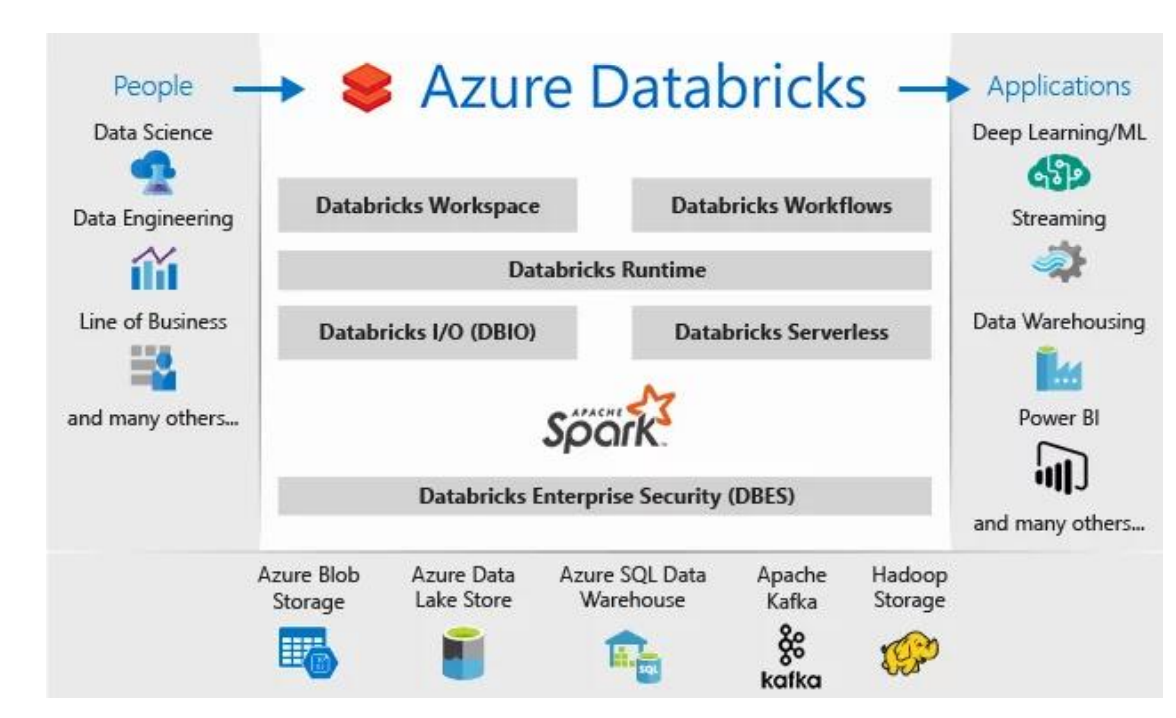

# Important topics

- Workspaces: They allow us to organize everything that we create in Databricks, is a folder structure to store the notebooks, they should not store data, only the notebooks.
- Notebooks: Code cells in which we can combine markdown, python, SQL, Scala, or R. They have a pre-defined language but every code cell can have its own language, they must be connected to a Cluster to execute the commands. The connection to the cluster is dynamic.
- Libraries: Modules that give extra functionalities they can be installed in every cluster.
- Tables: Structured data that can be used to perform the analysis. They can be stored in multiple locations, even in a Cluster or at the memory.
- Clusters: They are many computers (resources) that work as a single one. They allow us to execute the code. They can access control.
- Jobs: Schedule a notebook execution at an specific time.

In order to configure the language for a specific cell we just have to add: %language at the beginning of the cell.



# Databricks utilities

They allow us to generate new object, relate notebooks and manage the secrets of our workspace.

- dbutils.help() Will show us all the different activities that we can create at our workspace.

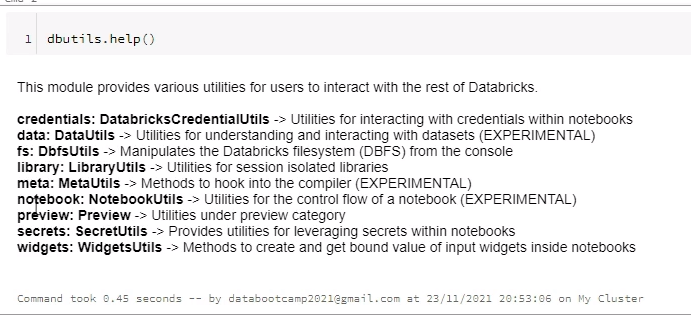

These are the main categories, we can access to the detail of each category just by dbutils.activity.help() 

dbutils.notebook.run('path', timeOut) #To run another notebook inside one, after the execution we must exit the other notebook with .dbutils.notebook.exit('path').

## dbutils secrets

- dbutils.secrets.get(scope='yourScope', key='YourKey')#Get a secret
- dbutils.secrets.list('YourScope')#Display a list with all the secrets for that scope

## Widgets

We can use them to dynamically interact with the notebook.

Its useful to create a menu at the top of the notebook which we are going to use to set environment variables for example.

In order to get the values that were set in each of the parameters we just have to use the get method with the name of the widget>

dbutils.widgets.get('dropdownName')

```python
dbutils.widgets.combobox(
    name='comboboxName',
    defaultValue='mainValue',
    choices=['secondValue', 'thirdValue', 'Other'],
    label='FirstCombobox'
)
print(dbutils.widgets.get('comboboxName'))

dbutils.widgets.dropdown(
    name='dropdownName',
    defaultValue='mainValue',
    choices=['secondValue', 'thirdValue', 'Other'],
    label='FirstDropdown'
)

print(dbutils.widgets.get('dropdownName'))
```

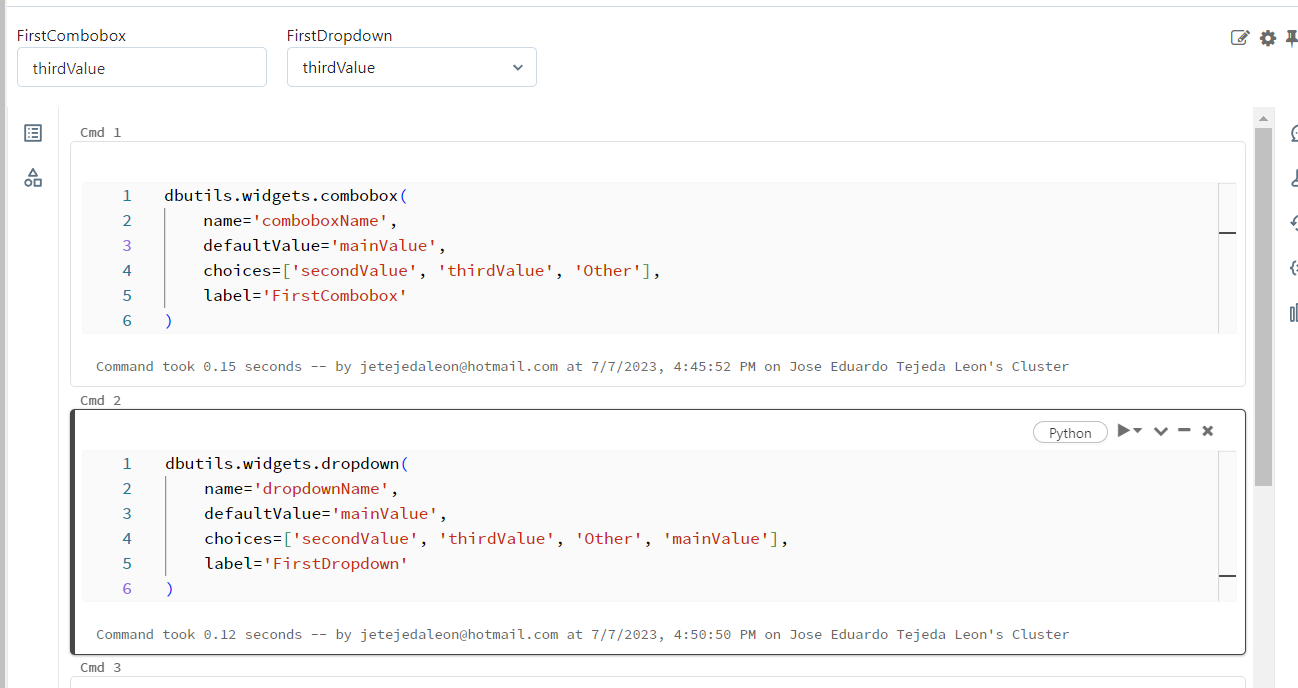

